In [3]:
import numpy as np # for random data
#import pandas as pd  # for convinience
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt  # for graphics
#import seaborn as sns  # for nicer graphics
from matplotlib.collections import PolyCollection
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
from PIL import ImageColor
#from colour import Color
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [4]:
def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

In [5]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)



In [6]:
def draw_y(x, y, z, x_limit, mean, pic, draw_interval = 5):

    verts = []
    zs = []
    colors = []

    c1='#1f77b4' #blue
    c2='green' #green


    for index, _ in enumerate(y):

        if index % draw_interval != 0:
            continue

        xs = list(x[index,:].flatten())
        ys = list(z[index,:].flatten())

        zs.append(x_limit + mean + index)

        verts.append(polygon_under_graph(x[index], z[index]))

    n = len(zs)
    for i in range(n):
        colors.append(ImageColor.getcolor(colorFader(c1,c2,i/n), "RGB"))

    #print(colors)

    poly = PolyCollection(verts, facecolors=colors, alpha=.4)

    pic.add_collection3d(poly, zs=zs, zdir='y')

In [7]:
def draw_x(x, y, z, y_limit, mean, pic, draw_interval = 5):

    y = y.T
    verts = []
    zs = []
    colors = []

    c1='purple' #blue
    c2='yellow' #green


    for index, _ in enumerate(x):

        if index % draw_interval != 0:
            continue

        xs = list(y[index,:].flatten())
        ys = list(z[index,:].flatten())

        zs.append(-y_limit + mean - index)

        verts.append(polygon_under_graph(y[index], z[index]))

    n = len(zs)
    for i in range(n):
        colors.append(ImageColor.getcolor(colorFader(c1,c2,i/n), "RGB"))

    #print(colors)

    poly = PolyCollection(verts, facecolors=colors, alpha=.4)

    pic.add_collection3d(poly, zs=zs, zdir='x')

In [72]:
def draw_dist(x, y, x_limit,mean , pic, draw_interval = 5):

    verts = []
    zs = []
    colors = []

    c1='#1f77b4' #blue
    c2='green' #green

    mu = np.sort(np.random.uniform(mean - 10,mean + 10, 10))
    
    for index in range(10):
        
        
        sigma = np.random.uniform(2 , 13)
        
        z = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu[index])**2 / (2 * sigma**2))
        z = z/np.max(z)*(20+np.random.uniform(-7,3))
        
        xs = list(x[index,:].flatten())
        ys = list(z[index,:].flatten())

        zs.append(x_limit + mean + index * draw_interval)

        verts.append(polygon_under_graph(x[index], z[index]))

    n = len(zs)
    for i in range(n):
        colors.append(ImageColor.getcolor(colorFader(c1,c2,i/n), "RGB"))

    #print(colors)

    poly = PolyCollection(verts, facecolors=colors, alpha=.4)

    pic.add_collection3d(poly, zs=zs, zdir='y')

In [73]:
def np_bivariate_normal_pdf(domain, mean, variance):
    X = np.arange(-domain+mean, domain+mean, variance)
    Y = np.arange(-domain+mean, domain+mean, variance)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(0.02*(X-mean)**2 + 0.03*(Y-mean)**2)
  
    Z = ((1. / np.sqrt(2 * np.pi)) * np.exp(-.5*R**2))
  
    return X+mean, Y+mean, Z

In [74]:
def get_test_data(delta, domain, mean):

    
    variance = delta

    X,Y,Z_init = np_bivariate_normal_pdf(domain, mean, variance)
    Z = 0.7 * domain * Z_init/np.max(Z_init)
    
    return X,Y,Z,Z_init

In [75]:

domain = 30
mean = np.random.randint(domain)-domain//2


X, Y, Z, P, = get_test_data(0.1,domain, mean)
x, y, z, _, = get_test_data(0.5,domain, mean)

print(P)
print(P.flatten())
print(P.flatten()/np.sum(P.flatten()))

[[6.74969615e-11 7.16635738e-11 7.60721767e-11 ... 8.07358394e-11
  7.60721767e-11 7.16635738e-11]
 [7.38423624e-11 7.84006786e-11 8.32237349e-11 ... 8.83258293e-11
  8.32237349e-11 7.84006786e-11]
 [8.07600637e-11 8.57454122e-11 9.10203022e-11 ... 9.66003711e-11
  9.10203022e-11 8.57454122e-11]
 ...
 [8.82993356e-11 9.37500861e-11 9.95174079e-11 ... 1.05618398e-10
  9.95174079e-11 9.37500861e-11]
 [8.07600637e-11 8.57454122e-11 9.10203022e-11 ... 9.66003711e-11
  9.10203022e-11 8.57454122e-11]
 [7.38423624e-11 7.84006786e-11 8.32237349e-11 ... 8.83258293e-11
  8.32237349e-11 7.84006786e-11]]
[6.74969615e-11 7.16635738e-11 7.60721767e-11 ... 8.83258293e-11
 8.32237349e-11 7.84006786e-11]
[6.59598409e-15 7.00315662e-15 7.43397711e-15 ... 8.63143691e-15
 8.13284656e-15 7.66152456e-15]


In [76]:
index = np.arange(np.size(X))
new_P = P.flatten()/np.sum(P.flatten())
result = np.random.choice(index, 2000, replace=False, p=new_P  )
print(result)

[263150 185093 253443 ... 197766 148507 183959]


In [77]:
a = X.flatten()[result]
b = Y.flatten()[result]
c = np.ones_like(a)*-0.65 * domain

In [1]:


ax = plt.figure(figsize=(31,31)).add_subplot(projection='3d')




#X, Y, Z = axes3d.get_test_data(0.01)
#a, b, c = axes3d.get_test_data(0.4)
#x, y, z = axes3d.get_test_data(0.1)
#ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, alpha=0.3)
#scatter = ax.scatter(a, b, c, c='g', marker='x')
#cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.65*domain, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

draw_interval = 10

#draw_y(x, y, z, domain/2, mean, ax, draw_interval)
#draw_x(x, y, z, domain * 0.5, mean, ax, draw_interval)
draw_dist(x, y, domain * 1.5, mean, ax, draw_interval)  


ax.set_xlabel('X')
ax.set_xlim(-2.5*domain + mean, 2.5*domain + mean)
ax.set_ylabel('Y')
ax.set_ylim(-2.5*domain + mean, 2.5*domain + mean)
ax.set_zlabel('Z')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_zlim(-0.8*domain,0.8*domain)
plt.axis('off')
plt.show()


NameError: name 'plt' is not defined

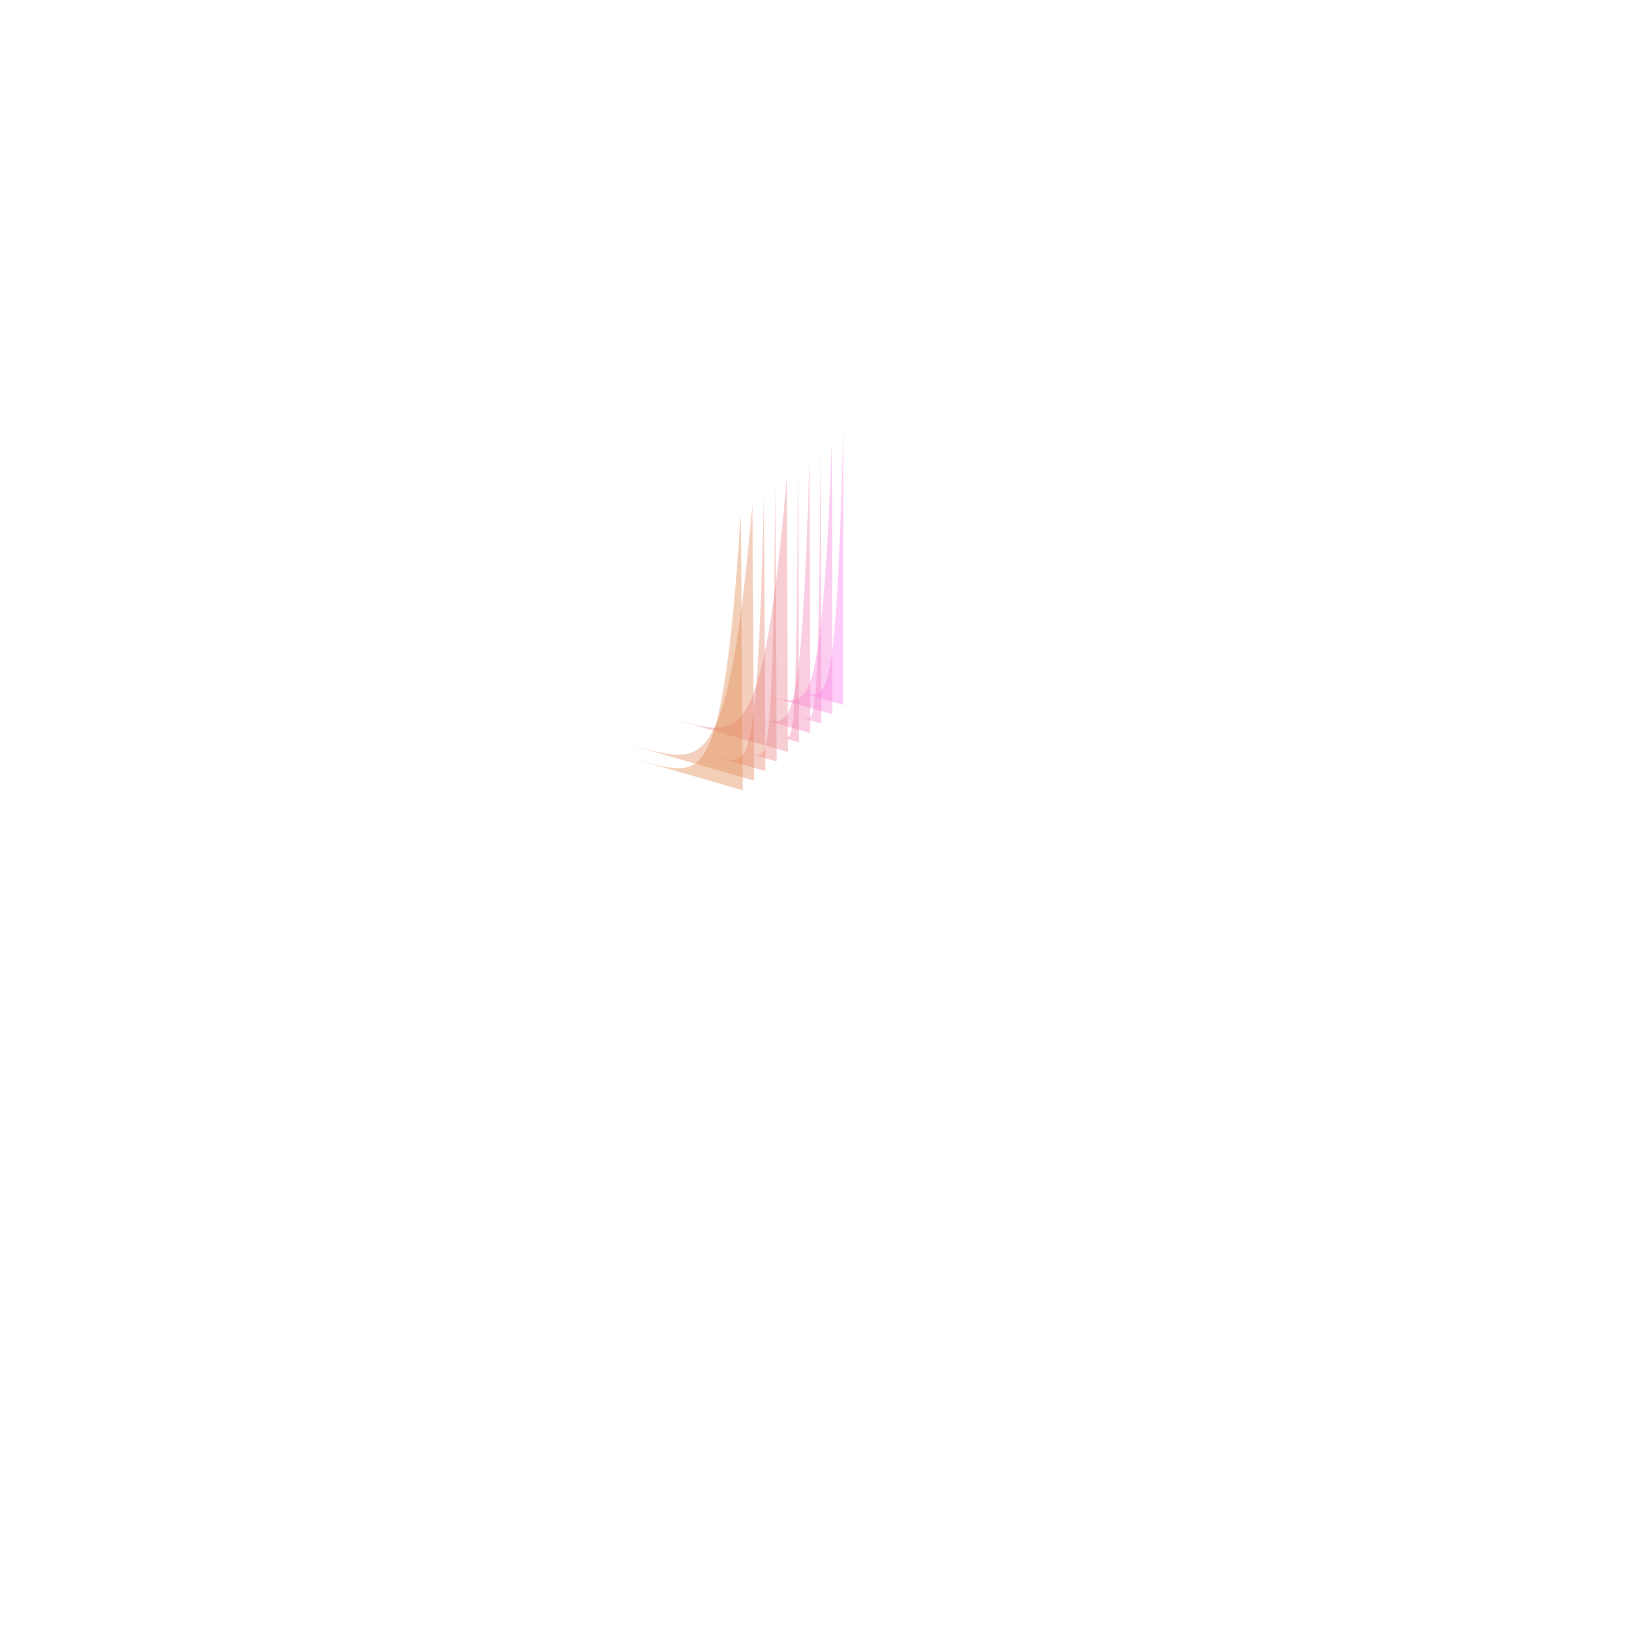

In [53]:
ax1 = plt.figure(figsize=(30,30)).add_subplot(projection='3d')

ss = np.zeros((len(X),len(X)))


draw_dist(x, y, mean, domain, ax1, draw_interval = 5)

ax1.set_xlabel('X')
ax1.set_xlim(-2.5*domain + mean, 5*domain + mean)
ax1.set_ylabel('Y')
ax1.set_ylim(-2.5*domain + mean, 5*domain + mean)
ax1.set_zlabel('Z')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

ax1.set_zlim(-0.8*domain,0.8*domain)
plt.axis('off')
plt.show()


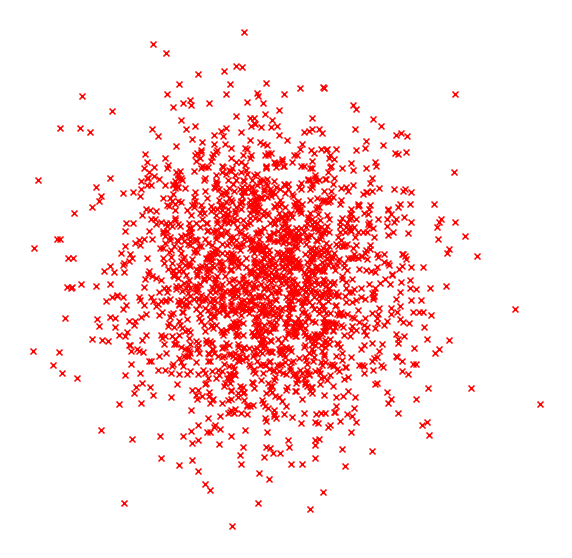

In [54]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(a, b, c='r', marker='x')
plt.axis('off')
plt.show()

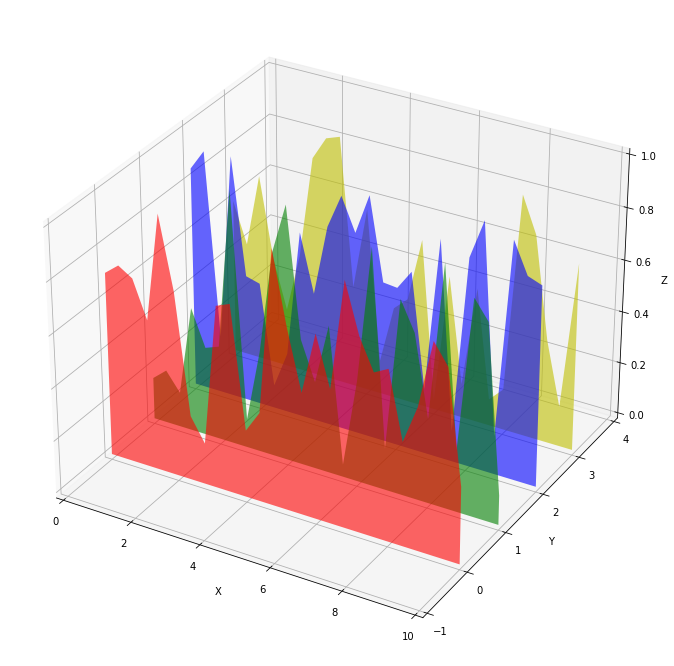

In [121]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


ax = plt.figure(figsize=(12,12)).add_subplot(projection='3d')

# Make verts a list such that verts[i] is a list of (x, y) pairs defining
# polygon i.
verts = []

# Set up the x sequence
xs = np.linspace(0., 10., 26)

# The ith polygon will appear on the plane y = zs[i]
zs = range(4)

for i in zs:
    ys = np.random.rand(len(xs))
    verts.append(polygon_under_graph(xs, ys))

poly = PolyCollection(verts, facecolors=['r', 'g', 'b', 'y'], alpha=.6)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 10)
ax.set_ylim(-1, 4)
ax.set_zlim(0, 1)

plt.show()

In [198]:
cmap = plt.cm.get_cmap(cmap)

NameError: name 'cmap' is not defined

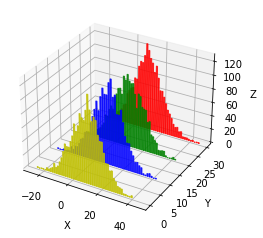

In [186]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 50
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    ys = np.random.normal(loc=10, scale=10, size=2000)

    hist, bins = np.histogram(ys, bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [181]:
np.mean(X)

-0.05000000000063827

In [187]:
ys

array([  0.29504018, -12.28965841,   2.11396401, ...,   7.99812982,
        21.11409706,   3.40275272])

In [75]:
ax1 = plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

In [105]:
print(np.shape(Y))
print(Y)

(600, 600)
[[-30.  -30.  -30.  ... -30.  -30.  -30. ]
 [-29.9 -29.9 -29.9 ... -29.9 -29.9 -29.9]
 [-29.8 -29.8 -29.8 ... -29.8 -29.8 -29.8]
 ...
 [ 29.7  29.7  29.7 ...  29.7  29.7  29.7]
 [ 29.8  29.8  29.8 ...  29.8  29.8  29.8]
 [ 29.9  29.9  29.9 ...  29.9  29.9  29.9]]


In [118]:
print(np.shape(X))
print(X)

(600, 600)
[[-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 ...
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]]


In [106]:
print(Z)

[[-0.00982064 -0.01011922 -0.01042583 ... -0.01074066 -0.01042583
  -0.01011922]
 [-0.01011922 -0.01042687 -0.01074281 ... -0.01106721 -0.01074281
  -0.01042687]
 [-0.01042583 -0.01074281 -0.01106831 ... -0.01140254 -0.01106831
  -0.01074281]
 ...
 [-0.00945044 -0.00975387 -0.01006574 ...  0.00731989  0.00749758
   0.00766691]
 [-0.00923361 -0.00952923 -0.00983306 ...  0.0062159   0.00639615
   0.00656826]
 [-0.009018   -0.00930593 -0.00960184 ...  0.00520643  0.00538861
   0.00556285]]


In [165]:
df2 = pd.DataFrame(z)

In [166]:
df2.index = list(np.round(x[0][:],decimals=1))
temp = y.T
df2.columns =list(np.round(temp[0][:],decimals=1))

In [167]:
df2

,-30.0,-26.0,-22.0,-18.0,-14.0,-10.0,-6.0,-2.0,2.0,6.0,10.0,14.0,18.0,22.0,26.0
-30.0,-0.009821,-0.030099,-0.078609,-0.174948,-0.331785,-0.536189,-0.738400,-0.866521,-0.866521,-0.738400,-0.536189,-0.331785,-0.174948,-0.078609,-0.030099
-26.0,-0.030099,-0.092249,-0.240925,-0.536189,-1.016872,-1.643340,-2.263090,-2.655760,-2.655760,-2.263090,-1.643340,-1.016872,-0.536189,-0.240925,-0.092249
-22.0,-0.078609,-0.240925,-0.629223,-1.400362,-2.655760,-4.291906,-5.910503,-6.936040,-6.936040,-5.910503,-4.291906,-2.655760,-1.400362,-0.629223,-0.240925
-18.0,-0.174947,-0.536188,-1.400361,-3.116561,-5.910499,-9.551807,-13.154058,-15.436429,-15.436427,-13.154052,-9.551797,-5.910488,-3.116549,-1.400350,-0.536179
-14.0,-0.331755,-1.016813,-2.655652,-5.910319,-11.208864,-18.114399,-24.945841,-29.274151,-29.274002,-24.945421,-18.113778,-11.208140,-5.909590,-2.654995,-1.016275
-10.0,-0.535172,-1.641342,-4.288250,-9.545580,-18.104935,-29.260283,-40.295148,-47.284596,-47.279567,-40.280949,-29.239322,-18.080481,-9.520939,-4.266060,-1.623189
-6.0,-0.720288,-2.227496,-5.845359,-13.043021,-24.770141,-40.054623,-55.160333,-64.692090,-64.602508,-54.907391,-39.681224,-24.334511,-12.604052,-5.450070,-1.904105
-2.0,-0.696382,-2.321417,-6.324113,-14.393348,-27.618902,-44.861823,-61.780462,-72.132190,-71.290718,-59.404491,-41.354359,-23.526884,-10.269965,-2.611036,0.716301
2.0,-0.023819,-0.999747,-3.905146,-10.269965,-21.072628,-35.182352,-48.450594,-55.035308,-50.867470,-36.682334,-17.809768,-0.804727,10.153283,14.485846,14.046168
6.0,1.462480,2.061914,2.005271,0.339200,-3.524552,-8.640410,-11.898949,-9.205059,1.680070,18.836175,36.731506,49.409055,53.678526,50.036960,41.357279


<AxesSubplot:ylabel='Density'>

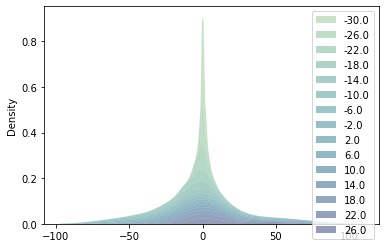

In [170]:
#ax1 = plt.figure(figsize=(12,12)).add_subplot(projection='3d')
sns.kdeplot(data = df2, multiple="stack",fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)